<a href="https://colab.research.google.com/github/AlessiaLombarda/UrbanSoundClassification/blob/main/UrbanSound8K_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup and utils

In [ ]:
!pip install librosa

In [ ]:
import os
import csv
import librosa
import numpy as np
import pandas as pd
import librosa.display
from pathlib import Path
import scipy.stats as scp
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

Function used to free memory space and eliminate a loaded dataset

In [ ]:
def delete_ds(path):
  for dir in os.listdir(path):
    if(dir!='.DS_Store'):
      for file in os.listdir(path+dir+"/"):
        if(file!='.DS_Store'):
          os.remove(path+dir+"/"+file)
      os.rmdir(path+dir)

  os.rmdir(path)

##Load original dataset

In [ ]:
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

In [ ]:
!tar -xf /content/drive/MyDrive/UrbanSound8K.tar.gz

In [ ]:
drive.flush_and_unmount()

##Dataset analysis

**Salience analysis**

In [ ]:
metadata = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

for i in metadata['class'].unique():
  print(i+ " Salience: \n"+str(metadata[metadata['class']==i]['salience'].value_counts()))

dog_bark Salience: 
1    645
2    355
Name: salience, dtype: int64
children_playing Salience: 
1    588
2    412
Name: salience, dtype: int64
car_horn Salience: 
2    276
1    153
Name: salience, dtype: int64
air_conditioner Salience: 
1    569
2    431
Name: salience, dtype: int64
street_music Salience: 
1    625
2    375
Name: salience, dtype: int64
gun_shot Salience: 
1    304
2     70
Name: salience, dtype: int64
siren Salience: 
2    660
1    269
Name: salience, dtype: int64
engine_idling Salience: 
1    916
2     84
Name: salience, dtype: int64
jackhammer Salience: 
1    731
2    269
Name: salience, dtype: int64
drilling Salience: 
1    902
2     98
Name: salience, dtype: int64


**Example of waveform for each class**

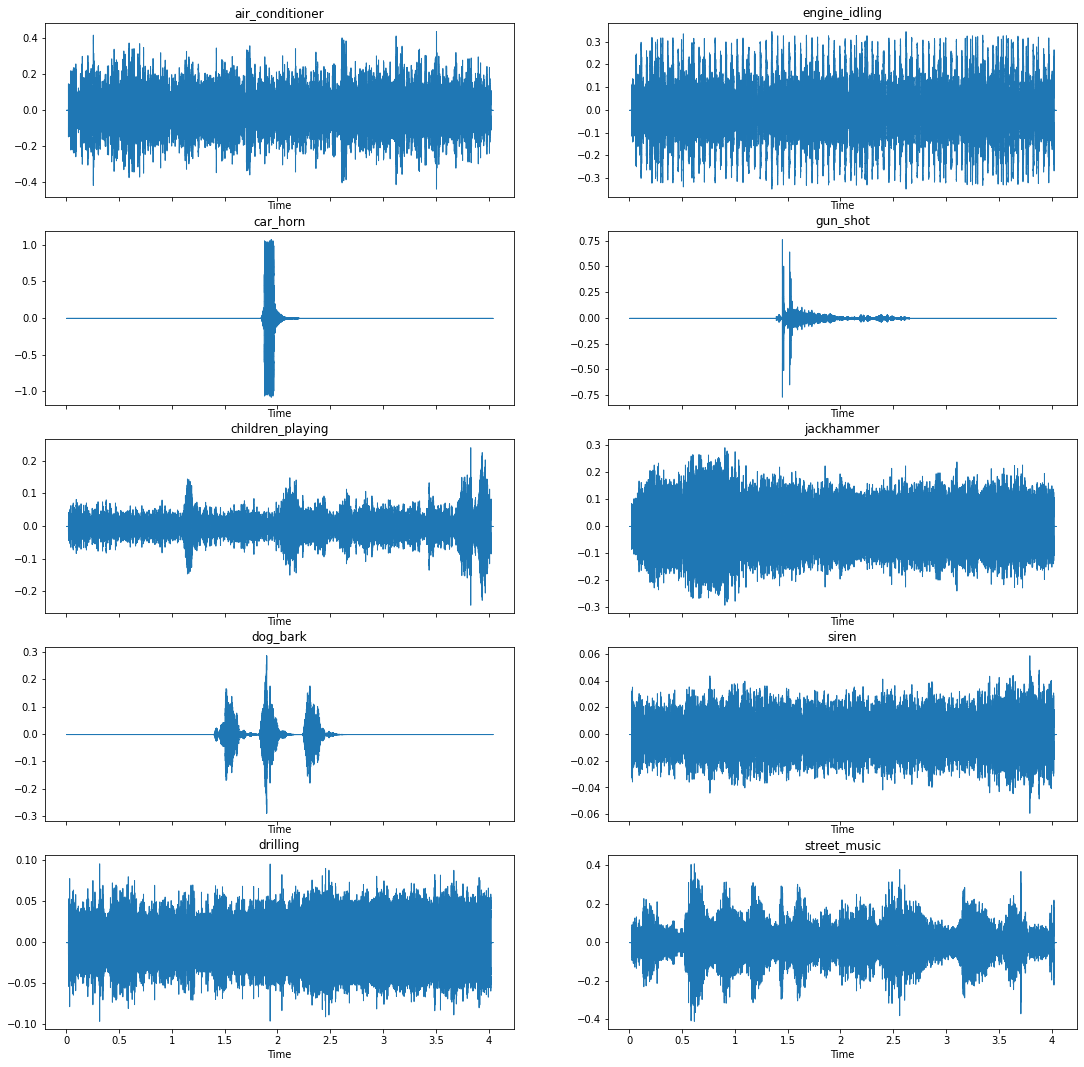

In [ ]:
import matplotlib.pyplot as plt

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/134717-0-0-25.wav')
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True)
fig.set_size_inches(18.5, 18.5, forward=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0][0])
ax[0][0].set(title='air_conditioner')
#ax[0][0].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/162540-1-0-0.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[1][0])
ax[1][0].set(title='car_horn')
#ax[1][0].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/160009-2-0-50.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[2][0])
ax[2][0].set(title='children_playing')
#ax[2][0].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold10/11722-3-0-0.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[3][0])
ax[3][0].set(title='dog_bark')
#ax[3][0].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/46669-4-0-49.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[4][0])
ax[4][0].set(title='drilling')
#ax[4][0].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/146186-5-0-8.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[0][1])
ax[0][1].set(title='engine_idling')
#ax[0][1].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold10/157207-6-6-0.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[1][1])
ax[1][1].set(title='gun_shot')
#ax[1][1].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/174276-7-3-0.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[2][1])
ax[2][1].set(title='jackhammer')
#ax[2][1].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/118279-8-0-8.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[3][1])
ax[3][1].set(title='siren')
#ax[3][1].label_outer()

y, sr = librosa.load('/content/UrbanSoundPreprocessed/fold1/137156-9-0-73.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[4][1])
ax[4][1].set(title='street_music')
#ax[4][1].label_outer()
plt.show()

##Resampling and adding padding

In [ ]:
fs = []

for dir in os.listdir("/content/UrbanSound8K/audio/"):
  if(dir!='.DS_Store'):
    for file in os.listdir("/content/UrbanSound8K/audio/"+dir+"/"):
      if(file!='.DS_Store'):
        file_path = "./UrbanSound8K/audio/"+dir+"/"+file
        sound_file, sampling_rate = librosa.load(file_path, sr = None)
        fs.append(sampling_rate)

In [ ]:
for el in np.unique(fs):
  print("Sampling freq.: "+str(el)+" Occ.: "+str(fs.count(el)))

Sampling freq.: 8000 Occ.: 12
Sampling freq.: 11024 Occ.: 7
Sampling freq.: 11025 Occ.: 39
Sampling freq.: 16000 Occ.: 45
Sampling freq.: 22050 Occ.: 44
Sampling freq.: 24000 Occ.: 82
Sampling freq.: 32000 Occ.: 4
Sampling freq.: 44100 Occ.: 5370
Sampling freq.: 48000 Occ.: 2502
Sampling freq.: 96000 Occ.: 610
Sampling freq.: 192000 Occ.: 17


**Resampling**

- Resampling at 44100 Hz

- Added padding to make all the sound files last 4 seconds

In [ ]:
uniform_sampling_rate = 44100
max_length = 0

for dir in os.listdir("/content/UrbanSound8K/audio/"):
  if(dir!='.DS_Store'):
    for file in os.listdir("/content/UrbanSound8K/audio/"+dir+"/"):
      if(file!='.DS_Store'):
        file_path = "./UrbanSound8K/audio/"+dir+"/"+file
        sound_file, sampling_rate = librosa.load(file_path, sr = None)
        y = librosa.core.resample(sound_file, sampling_rate, uniform_sampling_rate)
        if(len(y)>max_length):
          max_length = len(y)

In [ ]:
os.mkdir("/content/UrbanSoundPreprocessed/")
for dir in os.listdir("/content/UrbanSound8K/audio/"):
  if(dir!='.DS_Store'):
    os.mkdir("/content/UrbanSoundPreprocessed/"+dir)
    for file in os.listdir("/content/UrbanSound8K/audio/"+dir+"/"):
      if(file!='.DS_Store'):
        file_path = "./UrbanSound8K/audio/"+dir+"/"+file
        sound_file, sampling_rate = librosa.load(file_path, sr = None)
        y = librosa.core.resample(sound_file, sampling_rate, uniform_sampling_rate)
        y = librosa.util.pad_center(y, max_length)
        write("/content/UrbanSoundPreprocessed/"+dir+"/"+file, uniform_sampling_rate, y)

In [ ]:
!tar -czvf UrbanSoundPreprocessed.tar.gz /content/UrbanSoundPreprocessed
drive.mount('/content/drive')
!cp /content/UrbanSoundPreprocessed.tar.gz /content/drive/MyDrive
drive.flush_and_unmount()

##Load preprocessed dataset

In [ ]:
drive.mount('/content/drive')
!tar -xf /content/drive/MyDrive/UrbanSoundPreprocessed.tar.gz
drive.flush_and_unmount()
!cp -r /content/content/UrbanSoundPreprocessed /content/UrbanSoundPreprocessed
delete_ds("/content/content/UrbanSoundPreprocessed/")
os.rmdir("/content/content/")

##Feature extraction


**Create category file** 

In [ ]:
f = open("/content/categories.csv", "w", newline='')
header = ['class_index', 'class_name']
writer = csv.writer(f)
writer.writerow(header)

writer.writerow([0, 'air_conditioner'])
writer.writerow([1, 'car_horn'])
writer.writerow([2, 'children_playing'])
writer.writerow([3, 'dog_bark'])
writer.writerow([4, 'drilling'])
writer.writerow([5, 'engine_idling'])
writer.writerow([6, 'gun_shot'])
writer.writerow([7, 'jackhammer'])
writer.writerow([8, 'siren'])
writer.writerow([9, 'street_music'])

f.close()

###Examples of features extraction

In [ ]:
file_path = "/content/UrbanSoundPreprocessed/fold1/101415-3-0-8.wav"
sound_file, sampling_rate = librosa.load(file_path, sr = None)

**RMS energy**

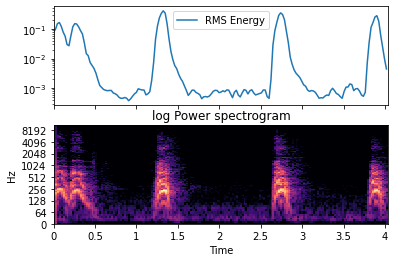

In [ ]:
energy = librosa.feature.rms(sound_file, frame_length=2048, hop_length=1024)
#print(np.min(energy), np.max(energy), np.median(energy), np.mean(energy), np.var(energy), scp.skew(energy.T)[0], scp.kurtosis(energy.T)[0])

fig, ax = plt.subplots(nrows=2, sharex=True)

times = librosa.times_like(energy)
ax[0].semilogy(times, energy[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
S, phase = librosa.magphase(librosa.stft(sound_file, hop_length=1024, win_length=2048))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')
plt.show()

**Zero Crossing Rate**

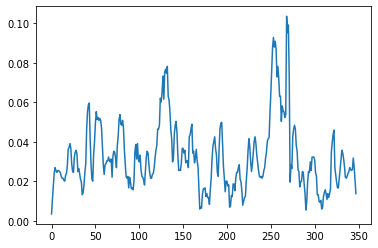

In [ ]:
zcr = librosa.feature.zero_crossing_rate(sound_file)
#print(np.min(zcr), np.max(zcr), np.median(zcr), np.mean(zcr), np.var(zcr), scp.skew(zcr.T)[0], scp.kurtosis(zcr.T)[0])
plt.plot(zcr[0])
plt.show()

**Spectral Centroid**

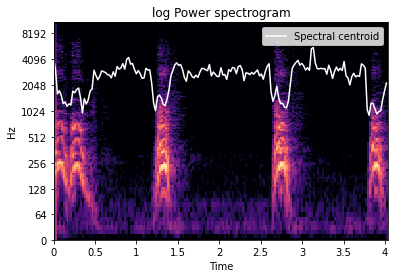

In [ ]:
cent = librosa.feature.spectral_centroid(sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
#print(np.min(cent), np.max(cent), np.median(cent), np.mean(cent), np.var(cent), scp.skew(cent.T)[0], scp.kurtosis(cent.T)[0])

times = librosa.times_like(cent)
fig, ax = plt.subplots()
S, phase = librosa.magphase(librosa.stft(sound_file, hop_length=1024, win_length=2048))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)

ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')
plt.show()

**Spectral bandwidth**

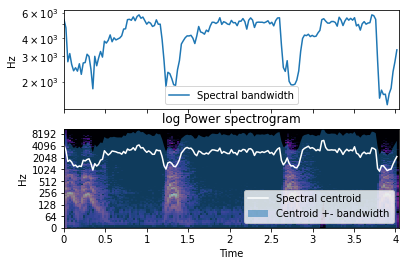

In [ ]:
spec_bw = librosa.feature.spectral_bandwidth(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
#print(np.min(spec_bw), np.max(spec_bw), np.median(spec_bw), np.mean(spec_bw), np.var(spec_bw), scp.skew(spec_bw.T)[0], scp.kurtosis(spec_bw.T)[0])

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
S, phase = librosa.magphase(librosa.stft(sound_file, hop_length=1024, win_length=2048))
centroid = librosa.feature.spectral_centroid(sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)

ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sampling_rate/2),
                alpha=0.5, label='Centroid +- bandwidth')

ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

plt.show()

**Spectral rolloff**

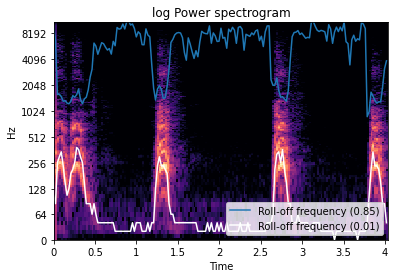

In [ ]:
spec_rolloff = librosa.feature.spectral_rolloff(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
spec_rolloff_min = librosa.feature.spectral_rolloff(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024, roll_percent=0.01)
#print(np.min(spec_rolloff), np.max(spec_rolloff), np.median(spec_rolloff), np.mean(spec_rolloff), np.var(spec_rolloff), scp.skew(spec_rolloff.T)[0], scp.kurtosis(spec_rolloff.T)[0])

S, phase = librosa.magphase(librosa.stft(sound_file, hop_length=1024, win_length=2048))

fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)

ax.plot(librosa.times_like(spec_rolloff), spec_rolloff[0], label='Roll-off frequency (0.85)')
ax.plot(librosa.times_like(spec_rolloff), spec_rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')

ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

plt.show()

**Spectral flatness**

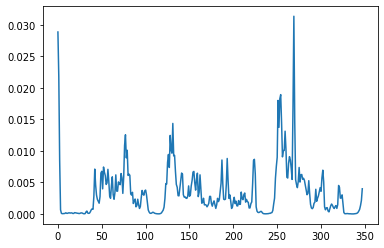

In [ ]:
flatness = librosa.feature.spectral_flatness(y=sound_file)
#print(np.min(flatness), np.max(flatness), np.median(flatness), np.mean(flatness), np.var(flatness), scp.skew(flatness.T)[0], scp.kurtosis(flatness.T)[0])
plt.plot(flatness[0])
plt.show()

**Melspectrogram and MFCC**

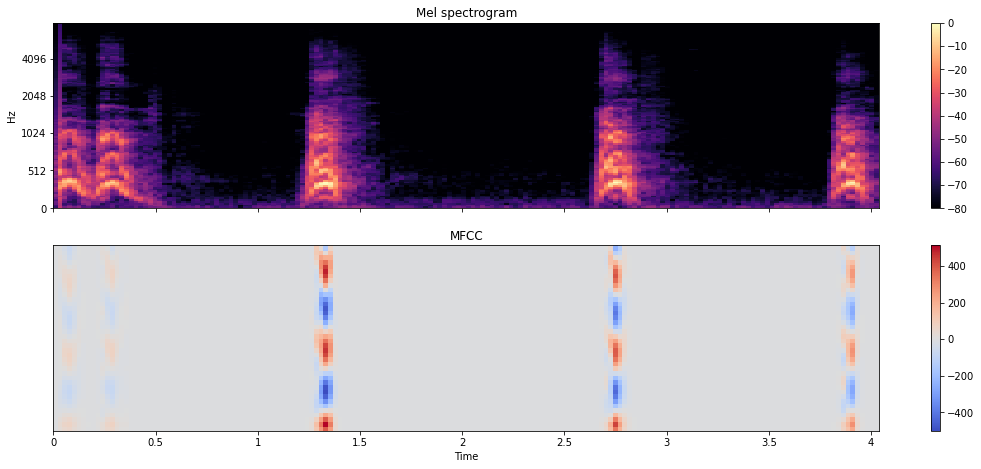

In [ ]:
S = librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)

mfcc_coefficients = librosa.feature.mfcc(y = sound_file, sr = sampling_rate, S=S, n_mfcc = 40)

mfccsscaled = np.mean(mfcc_coefficients.T,axis=0)

mfcc_delta1 = librosa.feature.delta(mfcc_coefficients, order=1)
mfcc_delta2 = librosa.feature.delta(mfcc_coefficients, order=2)
mfcc_features = []

for i in range(1,26):
  mfcc_features.append([np.min(mfcc_coefficients[i]), np.max(mfcc_coefficients[i]), np.median(mfcc_coefficients[i]), np.mean(mfcc_coefficients[i]), np.var(mfcc_coefficients[i]), scp.skew(mfcc_coefficients[i]), scp.kurtosis(mfcc_coefficients[i]), np.mean(mfcc_delta1[i]), np.var(mfcc_delta1[i]), np.mean(mfcc_delta2[i]), np.var(mfcc_delta2[i])])


fig, ax = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches(18.5, 7.5, forward=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(mfcc_coefficients, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')
plt.show()

**Chromagram**

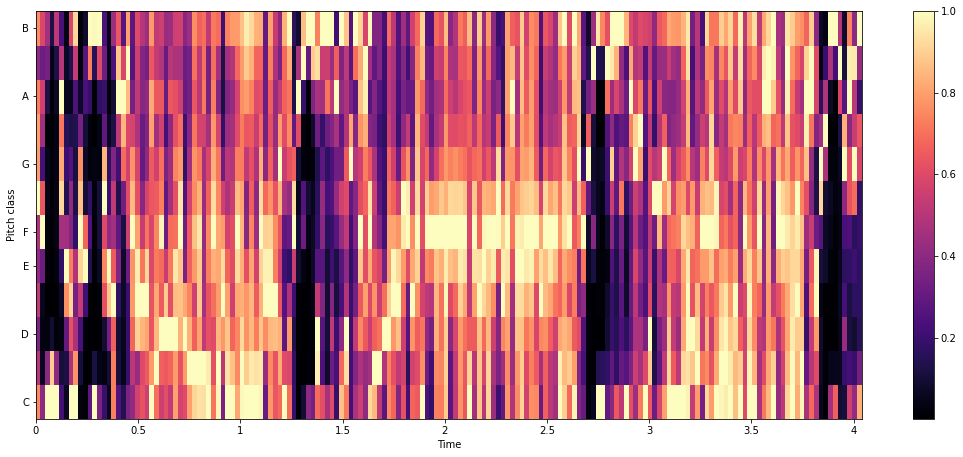

In [ ]:
chroma = librosa.feature.chroma_stft(y=sound_file, sr=sampling_rate, hop_length=1024, win_length=2048)

fig, ax = plt.subplots(nrows=1, sharex=True)
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
fig.colorbar(img)
fig.set_size_inches(18.5, 7.5, forward=True)
plt.show()

###Creation of feature file

In [ ]:
columns = ['filename', 'min', 'max', 'median', 'mean', 'var', #'coeff_var', 
           'rms', 
           'energy_min', 'energy_max', 'energy_median', 'energy_mean', 'energy_var', 
           'zcr_min', 'zcr_max', 'zcr_median', 'zcr_mean', 'zcr_var', 
           'cent_min', 'cent_max', 'cent_median', 'cent_mean', 'cent_var', 
           'bw_min', 'bw_max', 'bw_median', 'bw_mean', 'bw_var', 
           'rolloff_min', 'rolloff_max', 'rolloff_median', 'rolloff_mean', 'rolloff_var', 
           'flatness_min', 'flatness_max', 'flatness_median', 'flatness_mean', 'flatness_var']


for i in range(1,26):
          columns.append('mfcc'+str(i)+'_min')
          columns.append('mfcc'+str(i)+'_max')
          columns.append('mfcc'+str(i)+'_median')
          columns.append('mfcc'+str(i)+'_mean')
          columns.append('mfcc'+str(i)+'_var')
          columns.append('mfcc'+str(i)+'_skew')
          columns.append('mfcc'+str(i)+'_kurtosis')
          columns.append('mfcc'+str(i)+'_delta1_mean')
          columns.append('mfcc'+str(i)+'_delta1_var')
          columns.append('mfcc'+str(i)+'_delta2_mean')
          columns.append('mfcc'+str(i)+'_delta2_var')

for i in range (1,13):
  columns.append('chroma'+str(i)+'_min') 
  columns.append('chroma'+str(i)+'_max') 
  columns.append('chroma'+str(i)+'_median')
  columns.append('chroma'+str(i)+'_mean')
  columns.append('chroma'+str(i)+'_var')

columns=columns+['fold','class']

df = []

for dir in os.listdir("/content/UrbanSoundPreprocessed/"):
  if(dir!='.DS_Store'):
    for file in os.listdir("/content/UrbanSoundPreprocessed/"+dir+"/"):
      if(file!='.DS_Store'):
        file_path = "./UrbanSoundPreprocessed/"+dir+"/"+file
        sound_file, sampling_rate = librosa.load(file_path, sr = None)
        category = file.split('-')[1]
        fold = dir[4:]

        energy = librosa.feature.rms(sound_file, frame_length=2048, hop_length=1024)
        zcr = librosa.feature.zero_crossing_rate(sound_file, frame_length=2048, hop_length=1024)
        cent = librosa.feature.spectral_centroid(sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
        spec_bw = librosa.feature.spectral_bandwidth(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
        spec_rolloff = librosa.feature.spectral_rolloff(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
        flatness = librosa.feature.spectral_flatness(y=sound_file, win_length=2048, hop_length=1024)
       
        S = librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate, win_length=2048, hop_length=1024)
        mfcc_coefficients = librosa.feature.mfcc(y=sound_file, sr = sampling_rate, S=S, n_mfcc = 40)
        mfcc_delta1 = librosa.feature.delta(mfcc_coefficients, order=1)
        mfcc_delta2 = librosa.feature.delta(mfcc_coefficients, order=2)

        data = [file, np.min(sound_file), np.max(sound_file), np.median(sound_file), np.mean(sound_file), np.var(sound_file), np.std(sound_file)/abs(np.mean(sound_file)), #np.sqrt(np.mean(sound_file**2)), 
                np.min(energy), np.max(energy), np.median(energy), np.mean(energy), np.var(energy), 
                np.min(zcr), np.max(zcr), np.median(zcr), np.mean(zcr), np.var(zcr), 
                np.min(cent), np.max(cent), np.median(cent), np.mean(cent), np.var(cent), 
                np.min(spec_bw), np.max(spec_bw), np.median(spec_bw), np.mean(spec_bw), np.var(spec_bw), 
                np.min(spec_rolloff), np.max(spec_rolloff), np.median(spec_rolloff), np.mean(spec_rolloff), np.var(spec_rolloff),
                np.min(flatness), np.max(flatness), np.median(flatness), np.mean(flatness), np.var(flatness)
                ]

        for i in range(1,26):
          data.append(np.min(mfcc_coefficients[i]))
          data.append(np.max(mfcc_coefficients[i]))
          data.append(np.median(mfcc_coefficients[i]))
          data.append(np.mean(mfcc_coefficients[i]))
          data.append(np.var(mfcc_coefficients[i]))
          data.append(scp.skew(mfcc_coefficients[i]))
          data.append(scp.kurtosis(mfcc_coefficients[i]))
          data.append(np.mean(mfcc_delta1[i]))
          data.append(np.var(mfcc_delta1[i]))
          data.append(np.mean(mfcc_delta2[i]))
          data.append(np.var(mfcc_delta2[i]))

        chroma = librosa.feature.chroma_stft(y=sound_file, sr=sampling_rate, hop_length=1024, win_length=2048)
        for i in range(0,12):
          data.append(np.min(chroma[i]))
          data.append(np.max(chroma[i]))
          data.append(np.median(chroma[i]))
          data.append(np.mean(chroma[i]))
          data.append(np.var(chroma[i]))

        data=data+[fold,category]
        df.append(data)

data = pd.DataFrame(df, columns=columns)
filepath = Path('/content/statistics.csv')  
data.to_csv(path_or_buf=filepath, index = False)

In [ ]:
drive.mount('/content/drive')
!cp /content/statistics.csv /content/drive/MyDrive
drive.flush_and_unmount()

#Feature selection

Load features file

In [ ]:
drive.mount('/content/drive')
!cp /content/drive/MyDrive/statistics.csv /content/statistics.csv
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/statistics.csv')
data.head()

,filename,min,max,median,mean,var,coeff_var,rms,energy_min,energy_max,...,chroma11_median,chroma11_mean,chroma11_var,chroma12_min,chroma12_max,chroma12_median,chroma12_mean,chroma12_var,fold,class
0,104817-4-0-8.wav,-0.221888,0.224921,0.000000,-4.191602e-05,0.002350,1156.446400,0.048474,0.022859,0.058789,...,0.670571,0.664595,0.073698,0.111611,0.874024,0.429009,0.443840,0.021745,2,4
1,166421-3-0-31.wav,-0.527919,0.504176,0.000000,2.314473e-07,0.000937,132289.080000,0.030618,0.000292,0.172168,...,0.447125,0.491054,0.090105,0.011351,1.000000,0.425028,0.467197,0.082544,2,3
2,146690-0-0-47.wav,-0.441998,0.398890,0.000000,-3.128187e-04,0.016139,406.110530,0.127039,0.032541,0.226888,...,0.870316,0.861239,0.009910,0.412151,1.000000,0.913308,0.883143,0.012188,2,0
3,201652-5-4-0.wav,-0.069642,0.072711,-0.000471,2.313569e-05,0.000476,943.098800,0.021819,0.010208,0.031514,...,0.738009,0.738053,0.016150,0.366236,1.000000,0.822514,0.811959,0.018626,2,5
4,147672-3-1-0.wav,-0.982636,0.964635,0.000000,-1.090968e-03,0.006877,76.010956,0.082933,0.000000,0.575786,...,0.000000,0.049614,0.034113,0.000000,0.937214,0.000000,0.038268,0.019592,2,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
rescaled_x = scaler.fit_transform(data.iloc[:,1:-2])
labels = data['class'] 
folds = data['fold']

###Compute PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
statistics_pca = pca.fit_transform(rescaled_x)

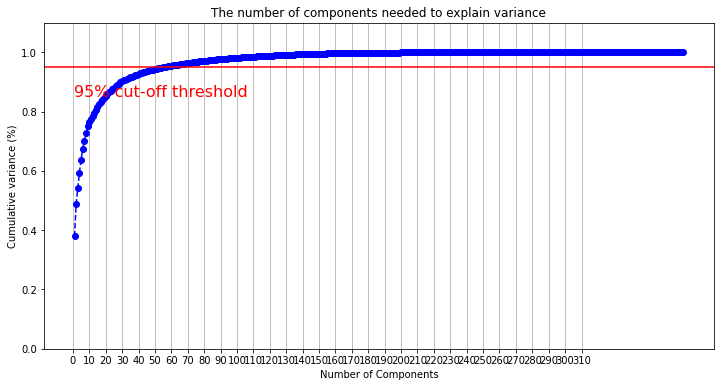

In [ ]:
pca = PCA().fit(rescaled_x)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 373, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 312, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()